In [1]:
import tensorflow as tf
import torch
from PIL import Image, ImageChops
from demo import *

2023-07-30 21:08:28.593297: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-30 21:08:28.594659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-30 21:08:28.630989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-30 21:08:28.631501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 21:08:29.190106: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

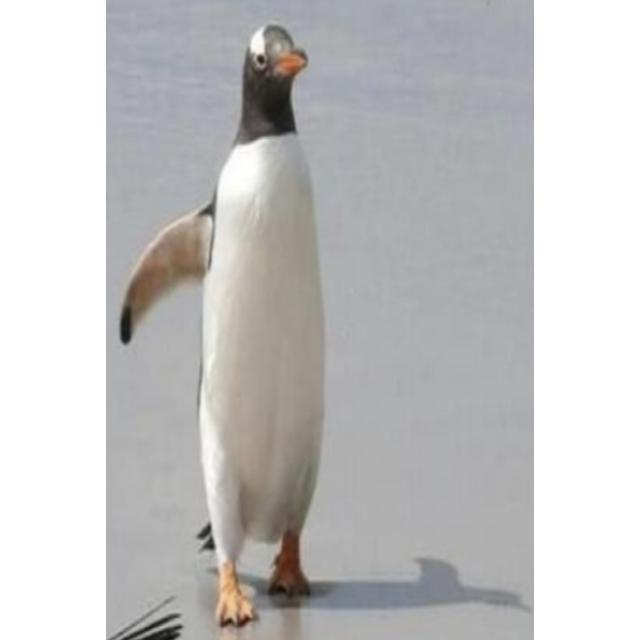

In [2]:
Image.open('datasets/train/image_id_0.jpg')

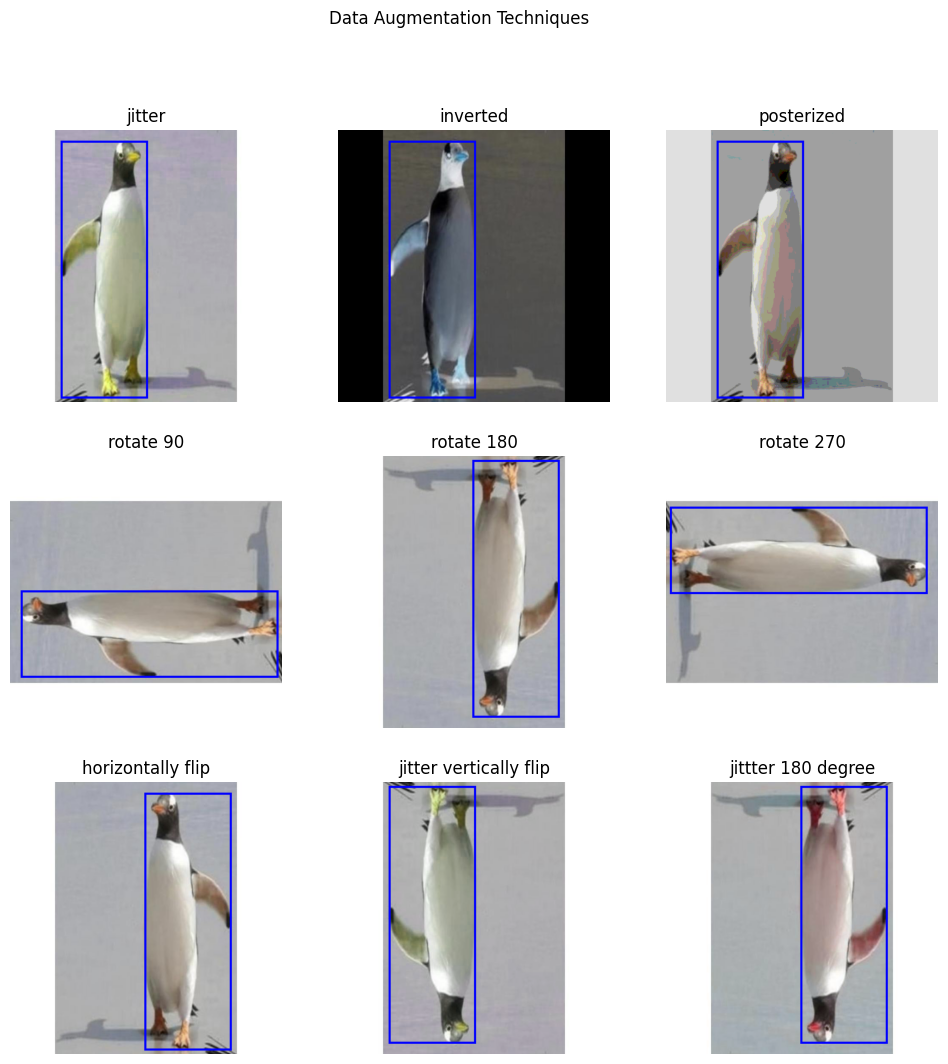

In [3]:
transformed = transform_image('datasets/train/image_id_0.jpg', 0)

In [4]:
device = 'cpu'
if torch.backends.mps.is_available():
    device = 'mps'
if torch.cuda.is_available():
    device = 'cuda'

In [5]:
model_file = 'detr_ciou_finetuned_pvt/checkpoint-2800'

image_processor = DetrImageProcessor.from_pretrained(model_file)
model = DetrForObjectDetection_v2.from_pretrained(model_file)
model.to(device)

DetrForObjectDetection_v2(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
   

In [6]:
classifier = tf.keras.models.load_model('demo_neural_net')

2023-07-30 21:09:03.428094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-30 21:09:03.429752: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


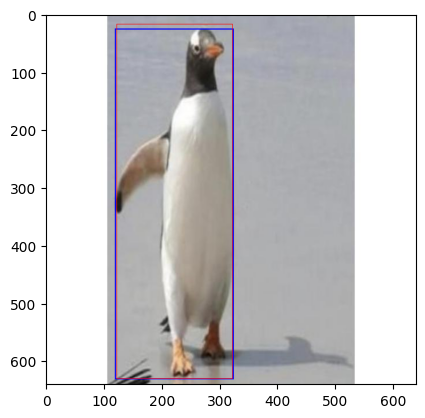

(0.851, [122.87, 17.32, 322.44, 630.78])

In [7]:
train_annotations = clean_annotations()
inference(model, device, image_processor, Image.open('datasets/train/image_id_0.jpg'), train_annotations[train_annotations.image_id == 0]['bbox'].tolist()[0])[1:]

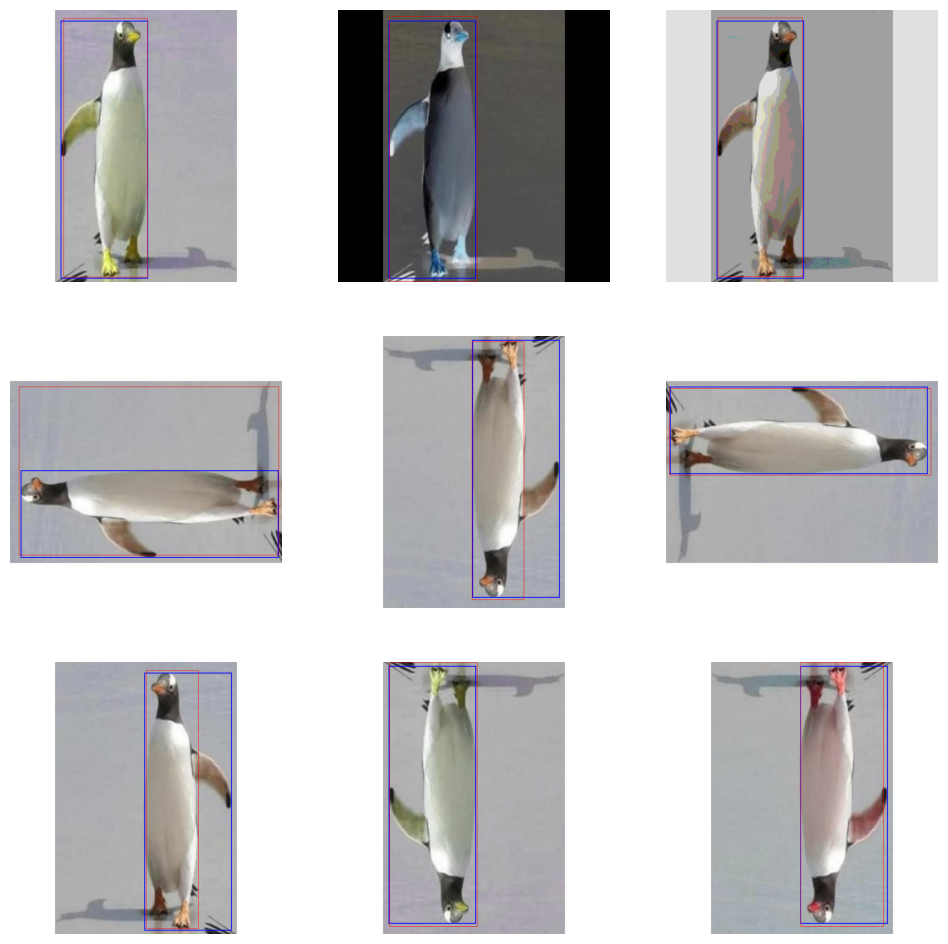

In [8]:
images, bboxes = inference_multiple(model, device, image_processor, [i[0] for i in transformed], [i[2] for i in transformed])

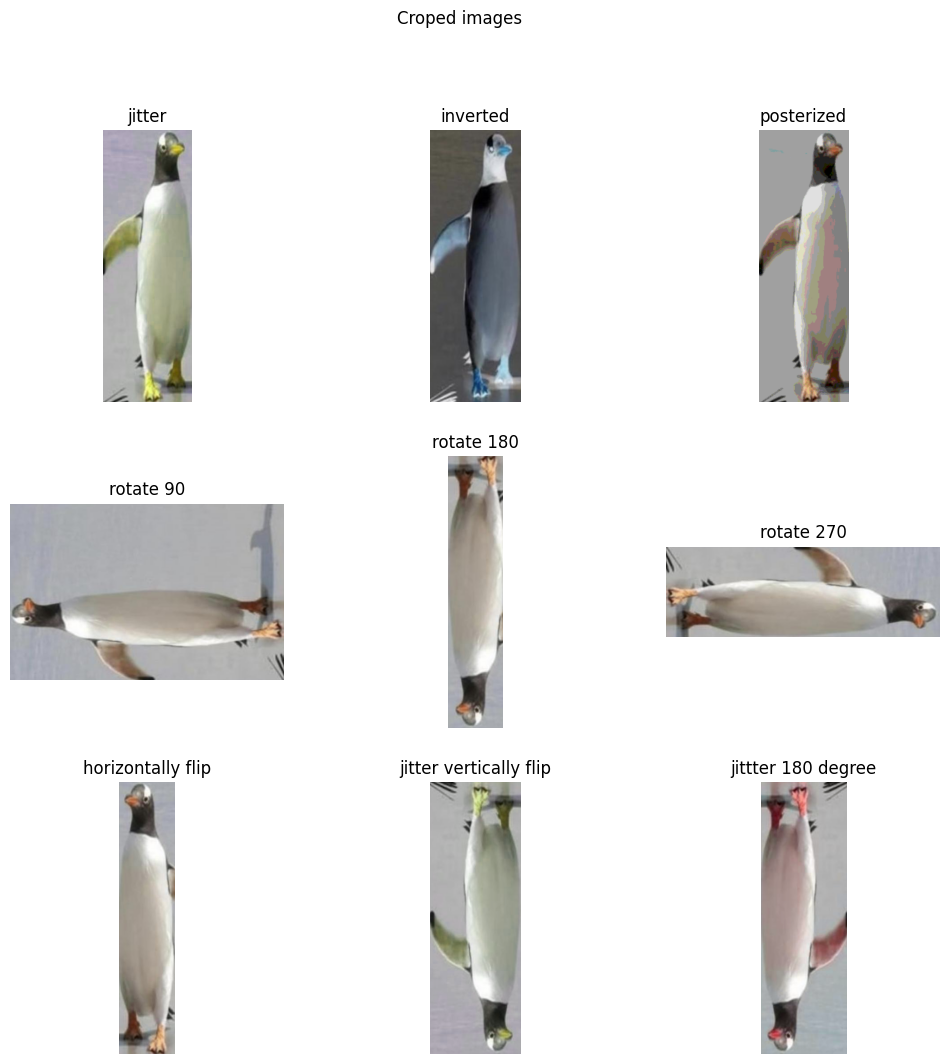

In [9]:
cropped_images = crop_from_bboxes(images, bboxes)

1/1 [==============================] - 0s 205ms/step


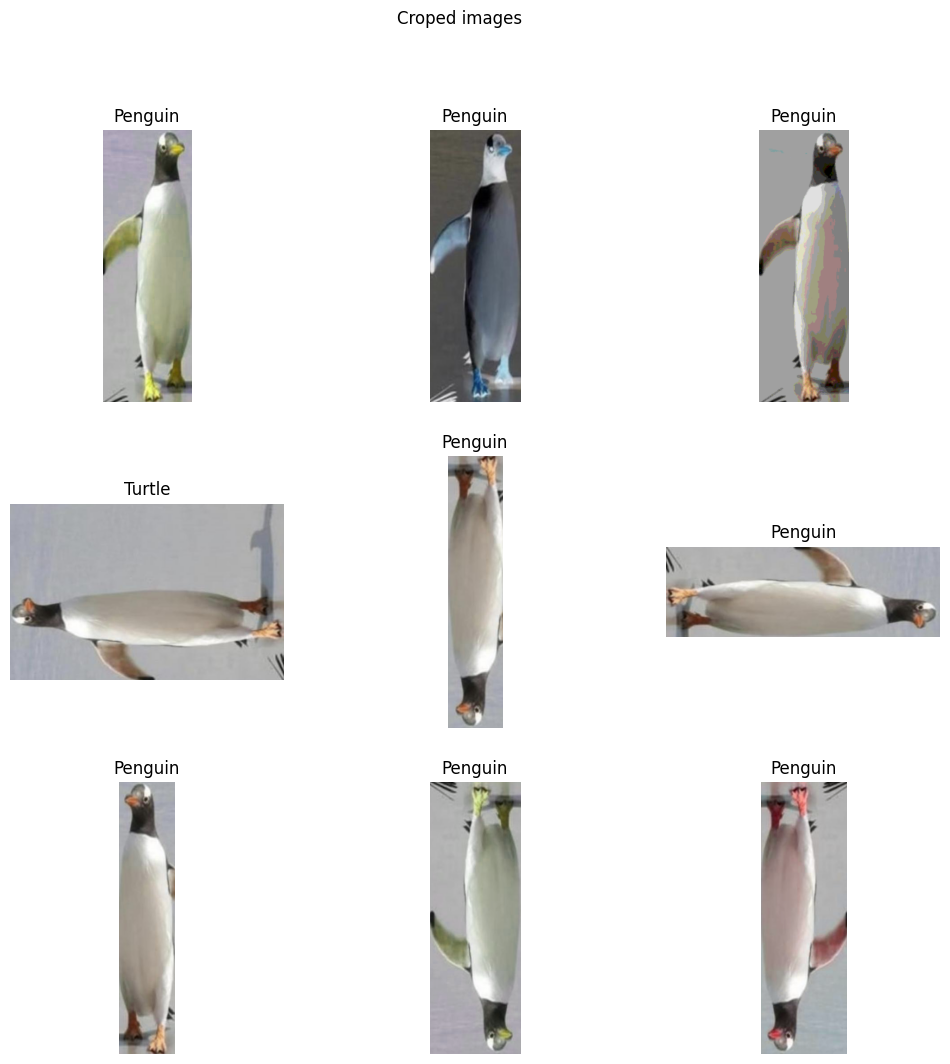

['Penguin',
 'Penguin',
 'Penguin',
 'Turtle',
 'Penguin',
 'Penguin',
 'Penguin',
 'Penguin',
 'Penguin']

In [10]:
predict_from_list(classifier, cropped_images)